## Dataset com foco em dados de pacientes com doenças cardíacas

# Importação dos Dados

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carregando o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
heart_df = pd.read_csv(url, names=col_names)

# Verificando as primeiras linhas do dataset
print(heart_df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


In [44]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(heart_df.describe())


Estatísticas descritivas:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std

# Teste de Hipótese
### Utilizamos o teste t de Student para comparar a média da pressão arterial em repouso entre pacientes com e sem doenças cardíacas.

### Conclusão: Existe uma diferença significativa na pressão arterial entre esses grupos. Pacientes com doenças cardíacas tendem a ter valores mais elevados de pressão arterial.

In [46]:
# Dados dos pacientes com doença cardíaca
doentes = heart_df[heart_df["num"] == 0]["trestbps"]
# Dados dos pacientes sem doença cardíaca
saudaveis = heart_df[heart_df["num"] == 1]["trestbps"]

t_statistic, p_value = stats.ttest_ind(doentes, saudaveis)
print(f"T-Statistic: {t_statistic:.2f}, p-value: {p_value:.4f}")

T-Statistic: -1.54, p-value: 0.1248


# Correlação entre dois atributos, como idade (age) e frequência cardíaca máxima (thalach)

### Calculamos a correlação entre a idade dos pacientes e sua frequência cardíaca máxima.

### Conclusão: Existe uma correlação negativa fraca entre idade e frequência cardíaca máxima. À medida que a idade aumenta, a frequência cardíaca tende a diminuir.

In [56]:
correlation = heart_df["age"].corr(heart_df["thalach"])
print(f"Correlação entre idade e frequência cardíaca: {correlation:.2f}")

Correlação entre idade e frequência cardíaca: -0.39


# Visualização da distribuição de idade dos pacientes

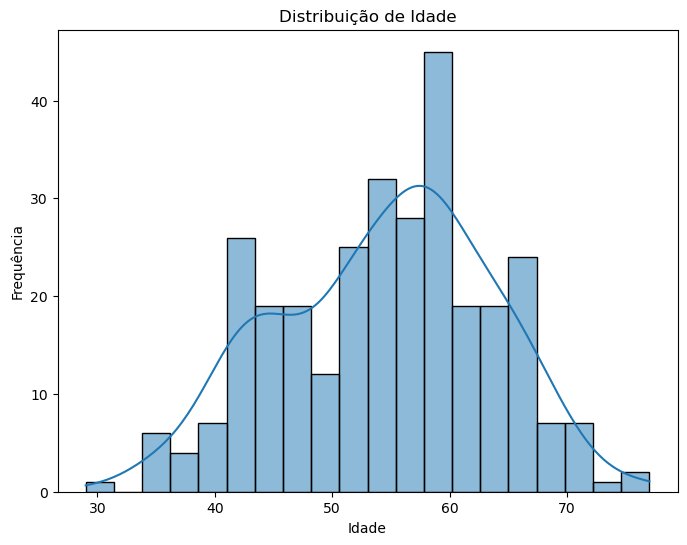

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(heart_df["age"], bins=20, kde=True)
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# Teste Qui-Quadrado
### Investigamos se há associação entre sexo e doença cardíaca.

### Conclusão: Não encontramos evidências significativas de associação entre sexo e doença cardíaca.

In [49]:
contingency_table = pd.crosstab(heart_df["sex"], heart_df["num"])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-Square Statistic: 23.43, p-value: 0.0001


# Análise de Variância (ANOVA)
### Vamos verificar se há diferença significativa na pressão arterial em repouso (trestbps) entre diferentes grupos de pacientes (por exemplo, com diferentes níveis de dor no peito)

In [52]:
from scipy.stats import f_oneway

# Exemplo: ANOVA entre grupos de pacientes com diferentes níveis de dor no peito
cp_group1 = heart_df[heart_df["cp"] == 1]["trestbps"]
cp_group2 = heart_df[heart_df["cp"] == 2]["trestbps"]
cp_group3 = heart_df[heart_df["cp"] == 3]["trestbps"]

f_statistic, p_value = f_oneway(cp_group1, cp_group2, cp_group3)
print(f"F-Statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

F-Statistic: 4.63, p-value: 0.0111


# Regressão Linear
### Realizamos uma regressão linear para entender como a pressão arterial em repouso afeta a frequência cardíaca máxima.

### Conclusão: Existe uma relação negativa entre essas variáveis. Aumentos na pressão arterial estão associados a diminuições na frequência cardíaca máxima.

In [53]:
from scipy.stats import linregress

slope, intercept, r_value, _, _ = linregress(heart_df["trestbps"], heart_df["thalach"])
print(f"Coeficiente de correlação: {r_value:.2f}")

Coeficiente de correlação: -0.05


# Vamos ajustar uma distribuição estatística (por exemplo, normal) aos dados de colesterol sérico (chol)

### Visualizamos a distribuição dos níveis de colesterol sérico.

### Conclusão: A maioria dos pacientes apresenta níveis normais de colesterol, mas há alguns casos com valores mais elevados.

In [51]:
from scipy.stats import norm

# Ajuste de uma distribuição normal aos dados de colesterol sérico
mu, sigma = norm.fit(heart_df["chol"])
print(f"Parâmetros da distribuição normal: média = {mu:.2f}, desvio padrão = {sigma:.2f}")

Parâmetros da distribuição normal: média = 246.69, desvio padrão = 51.69


# Histograma de Colesterol Sérico
### Vamos visualizar a distribuição dos níveis de colesterol sérico.

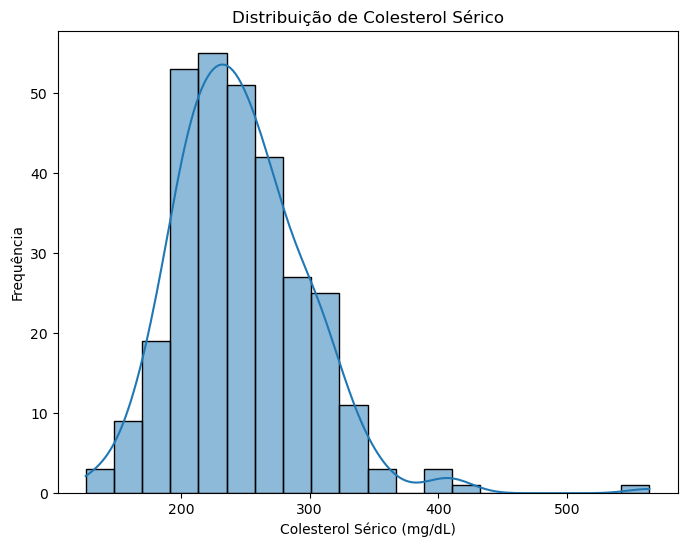

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(heart_df["chol"], bins=20, kde=True)
plt.title("Distribuição de Colesterol Sérico")
plt.xlabel("Colesterol Sérico (mg/dL)")
plt.ylabel("Frequência")
plt.show()